In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np



In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import files
uploaded = files.upload()

Saving project4_split_ocean.ipynb to project4_split_ocean.ipynb


In [4]:
#Read the CSV file
reduced_data = pd.read_csv('reduced_data_ronda.csv')
reduced_data.head()

,City,Region,Date,MHW (ft),MSL (ft),MLW (ft)
0,San Francisco,West,1/1/1923,4.532,2.514,0.562
1,San Francisco,West,2/1/1923,4.493,2.514,0.572
2,San Francisco,West,3/1/1923,4.204,2.203,0.224
3,San Francisco,West,4/1/1923,4.555,2.544,0.572
4,San Francisco,West,5/1/1923,4.384,2.354,0.395


In [5]:
# Calculate the average mean high for the West region
average_mean_high_west = reduced_data[reduced_data['Region'] == 'West']['MSL (ft)'].mean()

# Calculate the average mean low for the West region
average_mean_low_west = reduced_data[reduced_data['Region'] == 'West']['MLW (ft)'].mean()

# Calculate the average mean high for the East region
average_mean_high_east = reduced_data[reduced_data['Region'] == 'East']['MSL (ft)'].mean()

# Calculate the average mean low for the East region
average_mean_low_east = reduced_data[reduced_data['Region'] == 'East']['MLW (ft)'].mean()

print(f"Average Mean Highest for West Coast: {average_mean_high_west:.5f} ft.")
print(f"Average Mean Lowest for West Coast: {average_mean_low_west:.5f} ft.")
print(f"Average Mean Highest for East Coast: {average_mean_high_east:.5f} ft.")
print(f"Average Mean Lowest for East Coast: {average_mean_low_east:.5f} ft.")


Average Mean Highest for West Coast: 3.25240 ft.
Average Mean Lowest for West Coast: 1.14859 ft.
Average Mean Highest for East Coast: 2.86454 ft.
Average Mean Lowest for East Coast: 0.10997 ft.


In [6]:
# Convert the 'Date' column to datetime format
reduced_data['Date'] = pd.to_datetime(reduced_data['Date'])

# Extract the year from the 'Date' column and add it as a new column
reduced_data['Year'] = reduced_data['Date'].dt.year

reduced_data.head()

,City,Region,Date,MHW (ft),MSL (ft),MLW (ft),Year
0,San Francisco,West,1923-01-01,4.532,2.514,0.562,1923
1,San Francisco,West,1923-02-01,4.493,2.514,0.572,1923
2,San Francisco,West,1923-03-01,4.204,2.203,0.224,1923
3,San Francisco,West,1923-04-01,4.555,2.544,0.572,1923
4,San Francisco,West,1923-05-01,4.384,2.354,0.395,1923


In [7]:
# Calculate the annual averages
annual_averages = reduced_data.groupby('Year')[['MHW (ft)','MSL (ft)', 'MLW (ft)']].mean()

# Display the annual averages
print("Annual Averages:")
print(annual_averages)

Annual Averages:
      MHW (ft)  MSL (ft)  MLW (ft)
Year                              
1923  5.912633  2.659607  0.315050
1924  5.875583  2.615988  0.288350
1925  5.962583  2.742976  0.424317
1926  5.038231  2.695090  0.291744
1927  5.027060  2.696321  0.320452
...        ...       ...       ...
2019  5.934214  3.593012  1.191952
2020  5.902095  3.568881  1.181024
2021  5.845000  3.522619  1.152583
2022  5.840738  3.528738  1.176417
2023  5.862250  3.577821  1.263946

[101 rows x 3 columns]


In [8]:
# Create annual_average DataFrame
annual_averages_df = pd.DataFrame(annual_averages)
annual_averages_df

,MHW (ft),MSL (ft),MLW (ft)
Year,,,
1923,5.912633,2.659607,0.315050
1924,5.875583,2.615988,0.288350
1925,5.962583,2.742976,0.424317
1926,5.038231,2.695090,0.291744
1927,5.027060,2.696321,0.320452
...,...,...,...
2019,5.934214,3.593012,1.191952
2020,5.902095,3.568881,1.181024
2021,5.845000,3.522619,1.152583


In [9]:
# Adding the region to the annual_avarage DataFrame
annual_averages['Region'] = reduced_data['Region']
annual_averages

,MHW (ft),MSL (ft),MLW (ft),Region
Year,,,,
1923,5.912633,2.659607,0.315050,West
1924,5.875583,2.615988,0.288350,West
1925,5.962583,2.742976,0.424317,West
1926,5.038231,2.695090,0.291744,West
1927,5.027060,2.696321,0.320452,West
...,...,...,...,...
2019,5.934214,3.593012,1.191952,West
2020,5.902095,3.568881,1.181024,West
2021,5.845000,3.522619,1.152583,West


In [10]:
# Assigning the features values to X and target values to y
X = reduced_data['Year']
y = reduced_data['MSL (ft)']

In [11]:
X, y = make_blobs(centers=2, random_state=78, cluster_std=1.25)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (100, 2)
Shape of y: (100,)


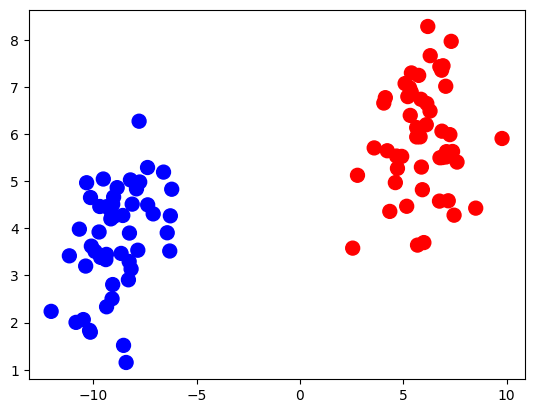

In [12]:
# Scatter plot for the model features
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=2, random_state=78, cluster_std=1.25)
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='bwr')

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Linear Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Printing the training and testing scores
print(f'Training data score {model.score(X_train, y_train)}.')
print(f'Testing data score {model.score(X_test, y_test)}.')

Training data score 1.0.
Testing data score 1.0.


In [17]:
# Create the nueral model
nn_model = tf.keras.models.Sequential()

# Create the hidden layers
nn_model.add(tf.keras.layers.Dense(units=5, activation='relu', input_dim=2))

# Create the output layers
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the the neural model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printing summary for the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Training the model using training values
fit_model = nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 19ms/step - loss: 0.1589 - accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 0.1518 - accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 0.1452 - accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.1385 - accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1324 - accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 0.1264 - accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 0.1208 - accuracy: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 0.1156 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1105 - accuracy: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 10ms/step - loss: 0.1056 - accuracy: 1.0000
Epoch 11/100
3/3 [=====

In [19]:
# Calculating the model accuracy and loss
model_loss, model_accuracy = nn_model.evaluate(X_test, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy {model_accuracy}')

1/1 - 0s - loss: 0.0109 - accuracy: 1.0000 - 108ms/epoch - 108ms/step
Loss: 0.01094275712966919, Accuracy 1.0
